# Model

First, declare functions that will be used to analyse the variables and to create the model.

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
sb.set_theme()

data = pd.read_csv("../data/movies_with_vars.csv")

def generateClassificationTree(data, predictorName,responseName, depth, class_names):
    print(f'{predictorName} vs. {responseName} with depth {depth}')
    response = pd.DataFrame(data[responseName]) # Response
    predictor = pd.DataFrame(data[predictorName]) # Predictor

    # Using the sample() method to get a more random train and test set
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor,response, test_size = 0.25)

    # Create a joint dataframe by concatenating Predictor and Response
    trainDF = pd.concat([predictor_train, response_train], axis = 1).reindex(predictor_train.index)

    # Joint Boxplot of Predictor Train against Response Train
    plt.figure(figsize=(12, 4))
    sb.swarmplot(x = predictorName, y = responseName, data = trainDF, orient = "h")

    # Create a Decision Tree Classifier object
    dectree = DecisionTreeClassifier(max_depth = depth)

    # Train the Decision Tree Classifier model
    dectree.fit(predictor, response)

    plt.figure(figsize=(16,16))
    plot_tree(dectree, filled=True, rounded=True, 
          feature_names=[predictorName], 
          class_names=class_names)

    # Print the Classification Accuracy
    print("Train Classification Accuracy \t:", dectree.score(predictor_train, response_train))
    print("Test Classification Accuracy \t:", dectree.score(predictor_test, response_test))

    response_train_pred = dectree.predict(predictor_train)
    response_test_pred = dectree.predict(predictor_test)
    
    return response_train, response_train_pred, response_test, response_test_pred

def generateConfusionMatrix(response, response_pred, title):
    plt.figure(figsize=(6,6))
    plt.title(title)
    sb.heatmap(confusion_matrix(response, response_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
    # find false positive and false negative from confusion matrix
    true_negative, false_positive, false_negative, true_positive = confusion_matrix(response, response_pred).ravel()
    print(f'True Positive Rate: {true_positive/(true_positive+false_negative)}')
    print(f'False Positive Rate: {false_positive/(false_positive+true_negative)}')
    print(f'True Negative Rate: {true_negative/(true_negative+false_positive)}')
    print(f'False Negative Rate: {false_negative/(false_negative+true_positive)}')
    
def performLinearRegression (data, predictor, response):
    response = pd.DataFrame(data[response]) # Response
    predictor = pd.DataFrame(data[predictor]) # Predictor

    # Using the sample() method to get a more random train and test set
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor,response, test_size = 0.25)
    
    # Create a Linear Regression object
    linreg = LinearRegression()

    # Train the Linear Regression model
    linreg.fit(predictor_train, response_train)

    # Coefficients of the Linear Regression line
    b = linreg.intercept_
    a = linreg.coef_

    print('Intercept \t: b = ', b)
    print('Coefficients \t: a = ', a)
    print('R^2', linreg.score(predictor_train, response_train))

    # Plot the Linear Regression line
    f = plt.figure(figsize=(16, 8))
    plt.scatter(predictor_train, response_train)
    plt.plot(predictor_train, b + a * predictor_train, color = "red")
    plt.xlabel(predictor.columns[0])
    plt.ylabel(response.columns[0])
    plt.show()
    
    return linreg, predictor_train, predictor_test, response_train, response_test

# Linear Regression

## Predictor vs. Vote Average

Intercept 	: b =  [6.50723844]
Coefficients 	: a =  [[0.21450593]]
R^2 0.0042068285954678375


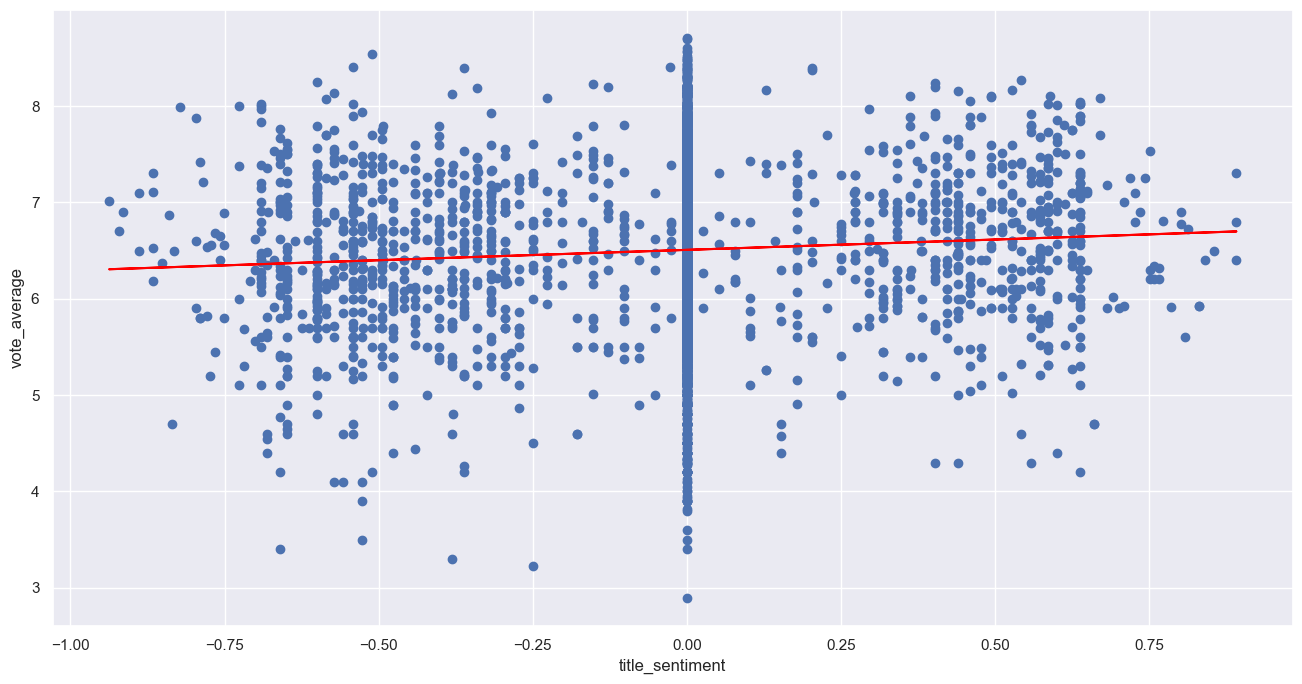

Intercept 	: b =  [6.51261757]
Coefficients 	: a =  [[0.12095336]]
R^2 0.008680189272822214


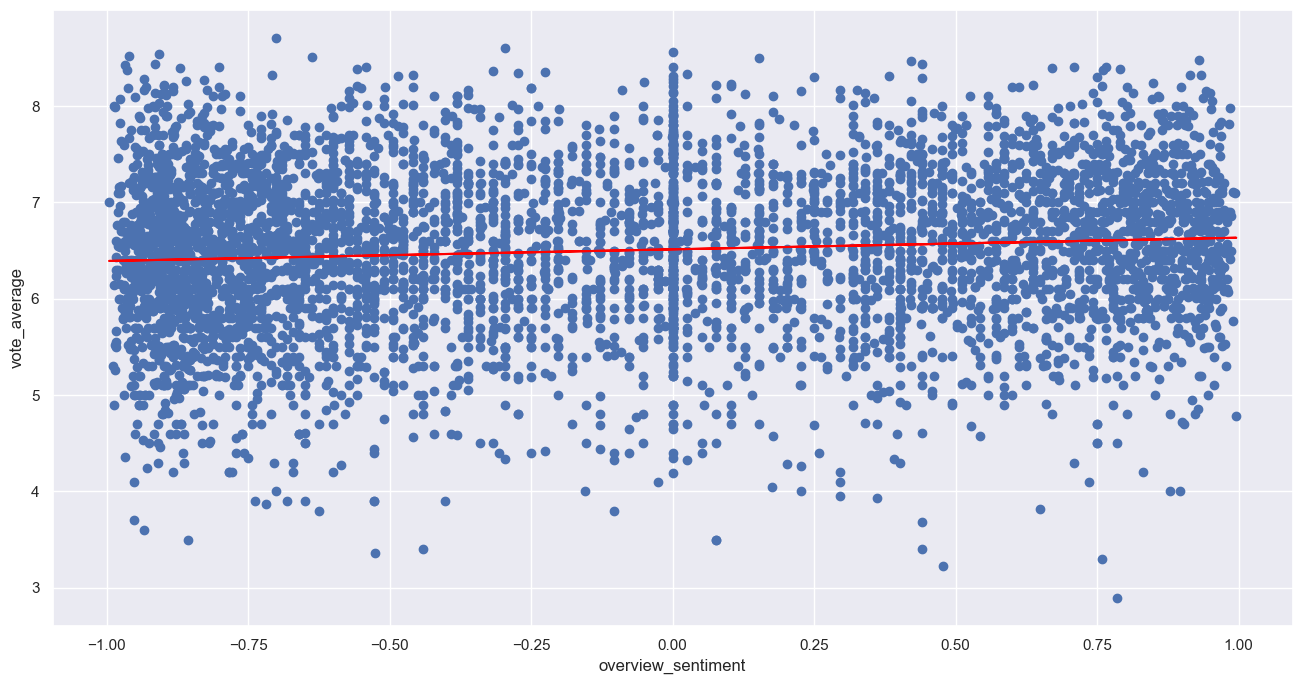

Intercept 	: b =  [6.43547633]
Coefficients 	: a =  [[0.00457806]]
R^2 0.0029871940118826323


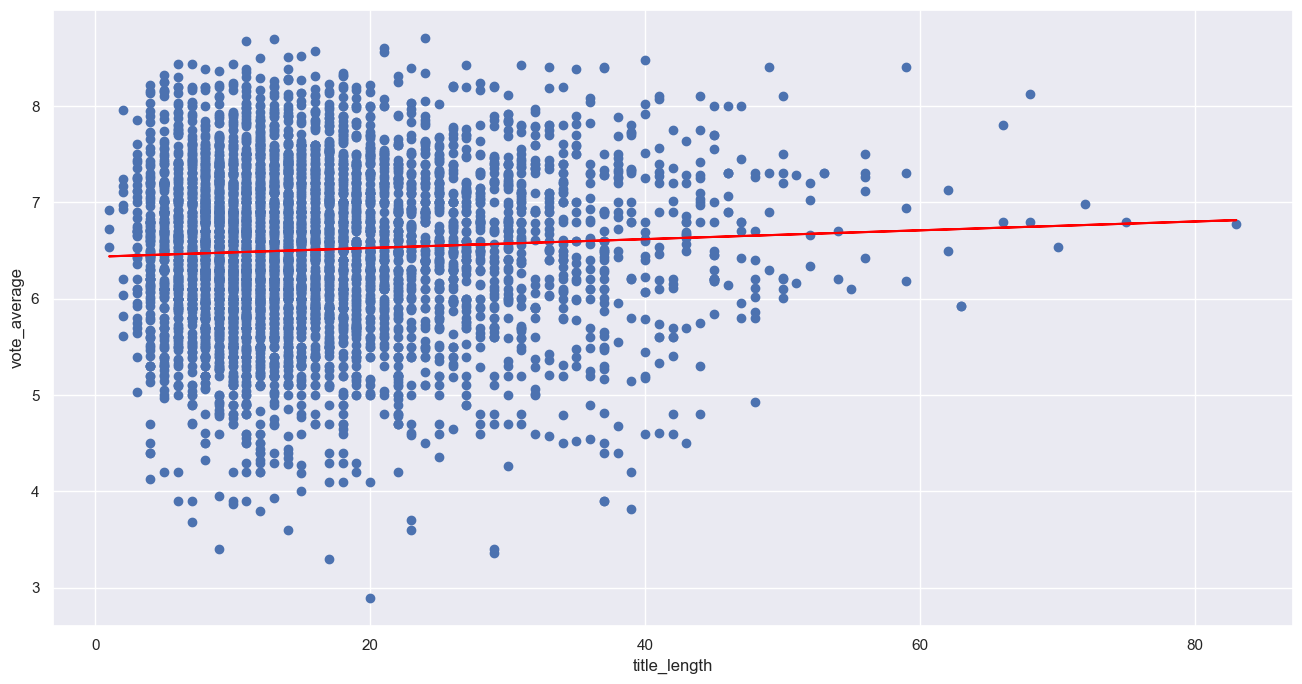

Intercept 	: b =  [6.44441976]
Coefficients 	: a =  [[0.0199488]]
R^2 0.0018720280591661975


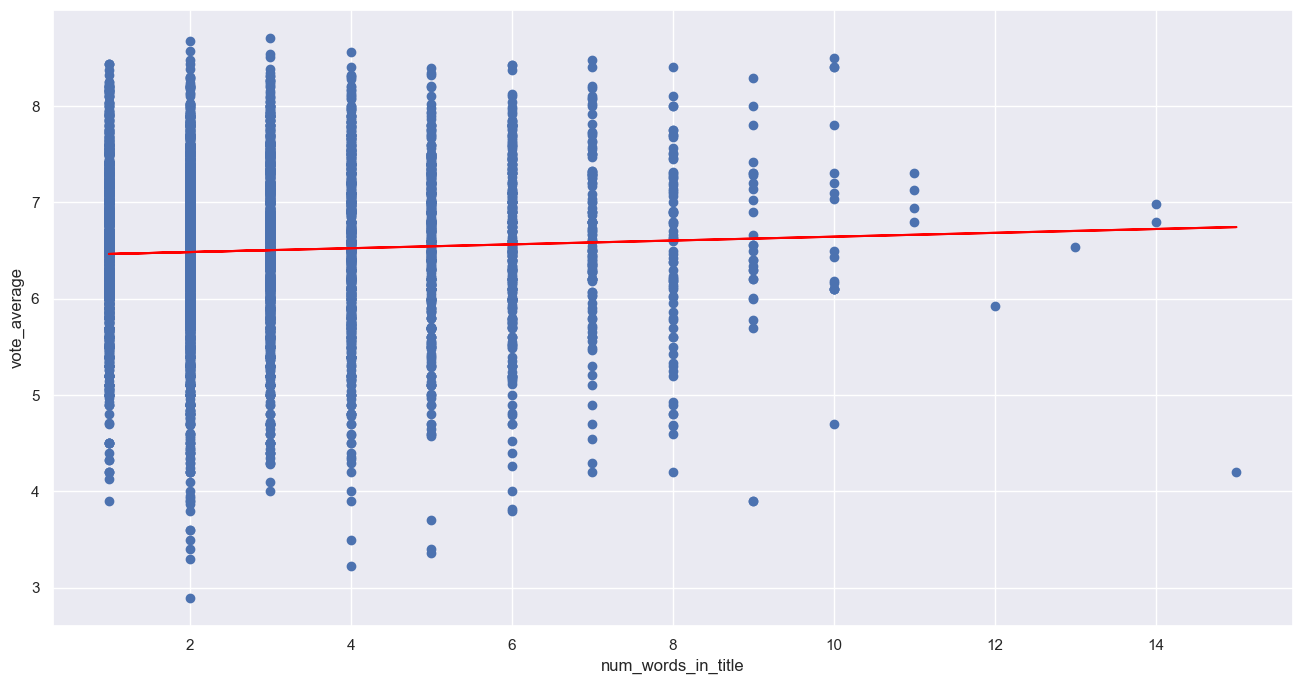

Intercept 	: b =  [6.5284532]
Coefficients 	: a =  [[-0.00378296]]
R^2 7.094746625524451e-05


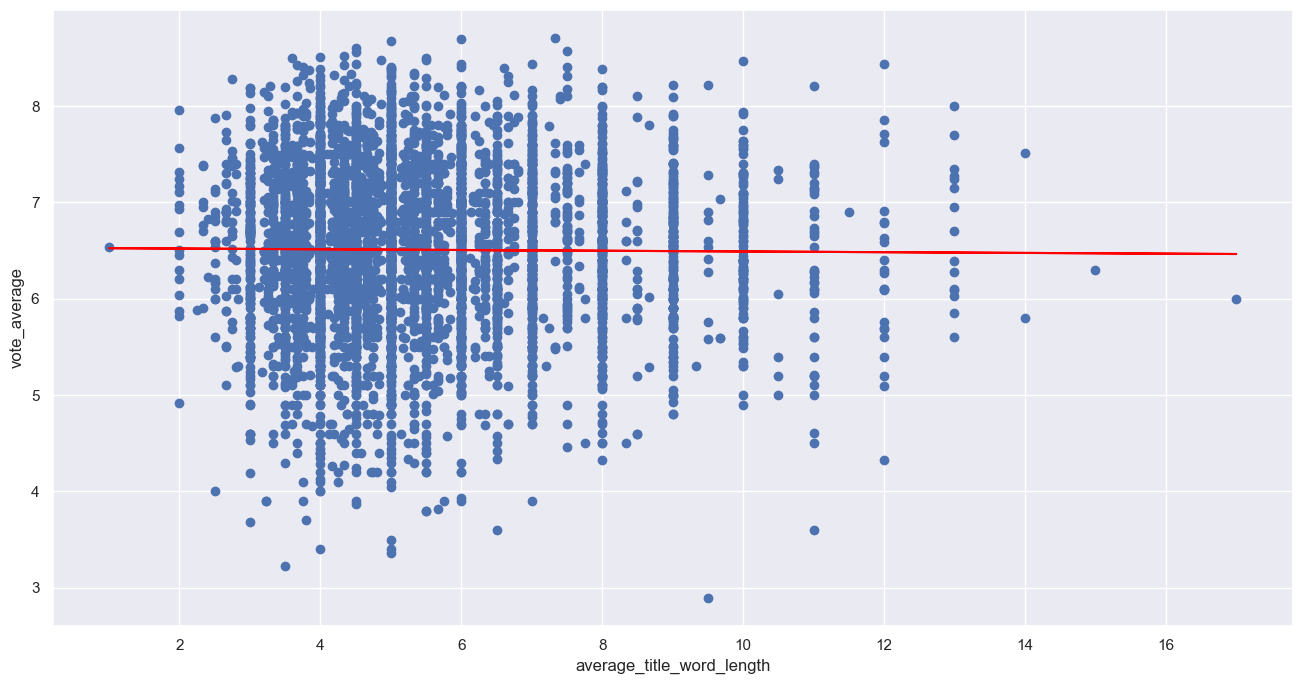

Intercept 	: b =  [6.49829238]
Coefficients 	: a =  [[0.0820082]]
R^2 0.001800966068717491


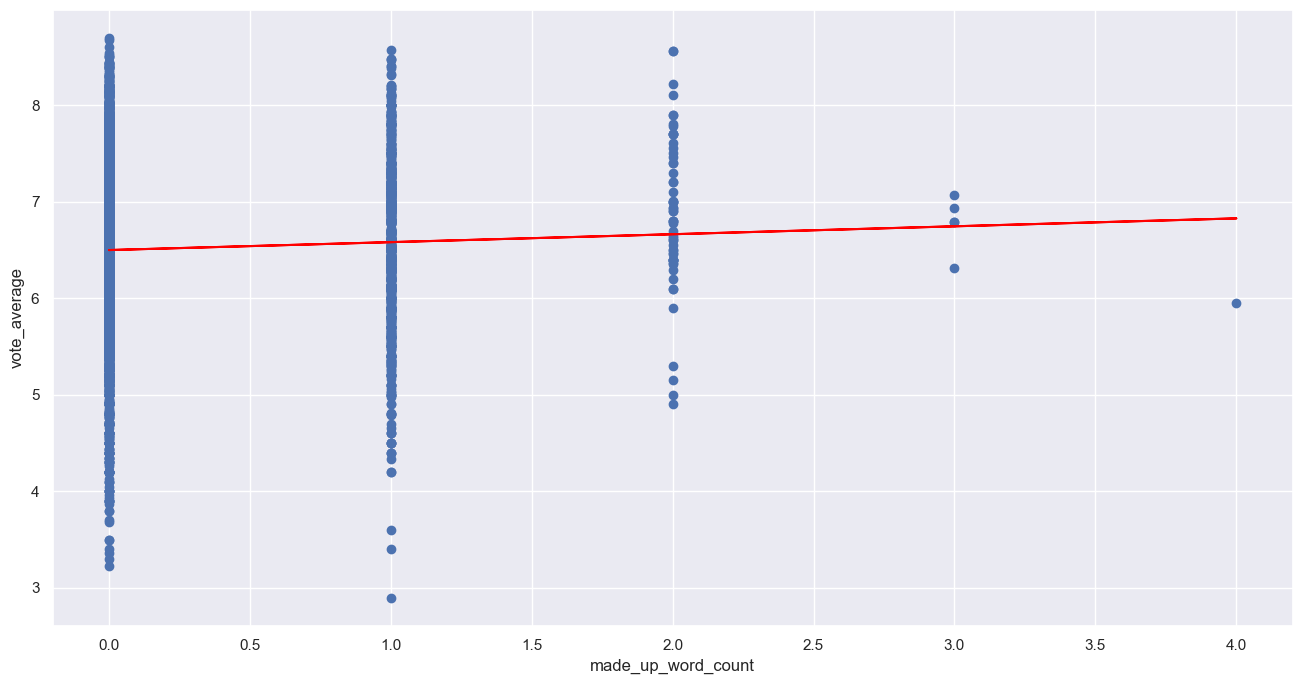

Intercept 	: b =  [6.49134053]
Coefficients 	: a =  [[0.00046229]]
R^2 0.0052139881258860266


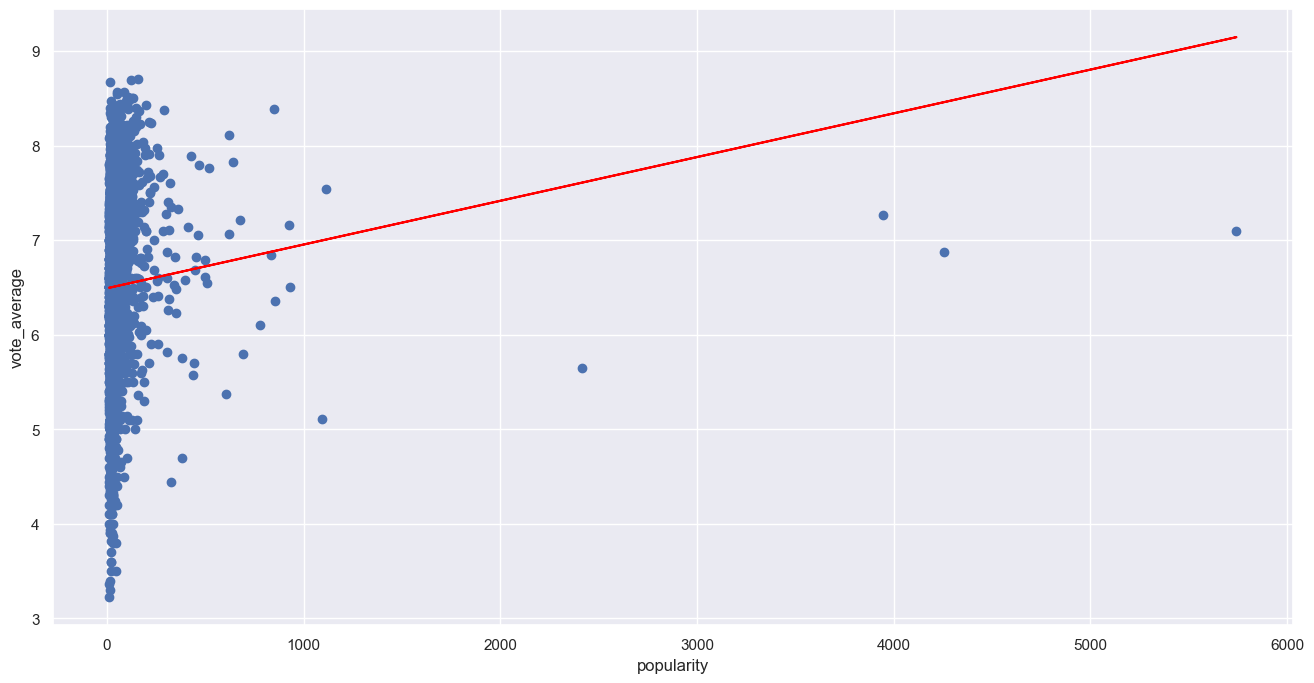

Intercept 	: b =  [6.31318876]
Coefficients 	: a =  [[8.78819182e-05]]
R^2 0.13808733356592673


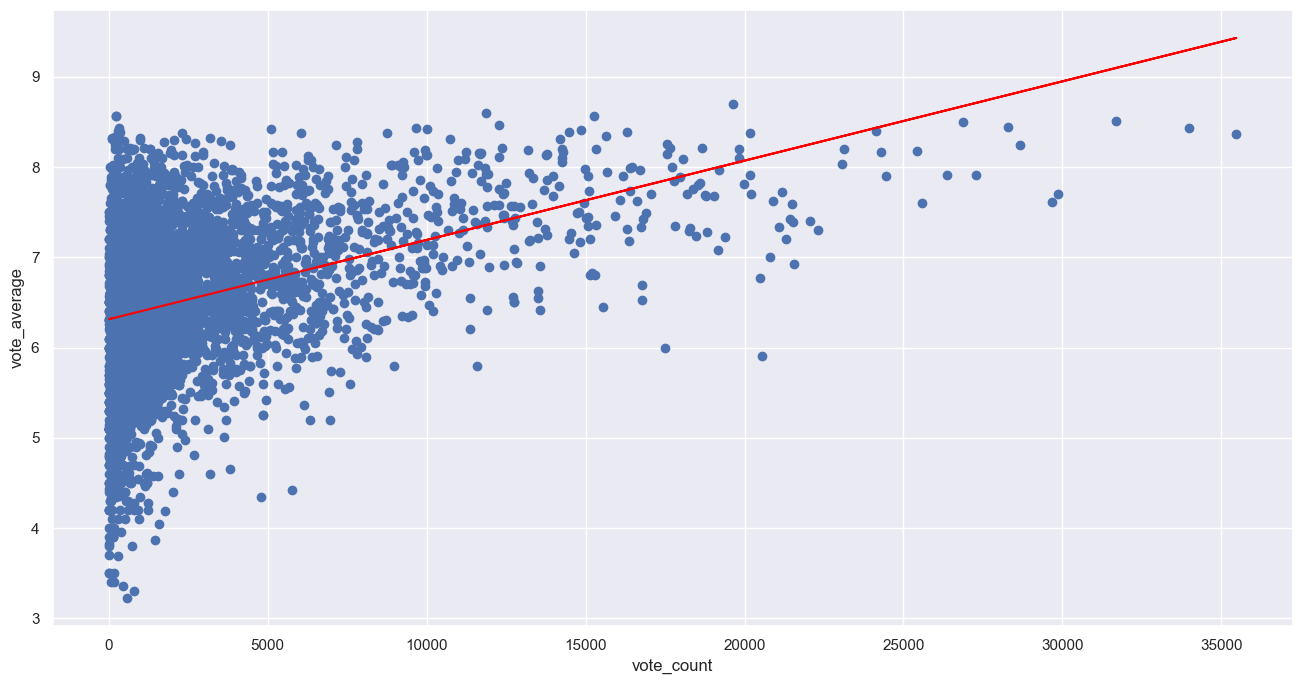

In [27]:
title_sentiment_linreg = performLinearRegression(data, 'title_sentiment', 'vote_average')
overview_sentiment_linreg = performLinearRegression(data, 'overview_sentiment', 'vote_average')
title_length_linreg = performLinearRegression(data, 'title_length', 'vote_average')
num_words_in_title_linreg = performLinearRegression(data, 'num_words_in_title', 'vote_average')
average_title_word_length_linreg = performLinearRegression(data, 'average_title_word_length', 'vote_average')
made_up_word_count_linreg = performLinearRegression(data, 'made_up_word_count', 'vote_average')
popularity_linreg = performLinearRegression(data, 'popularity', 'vote_average')
vote_count_linreg = performLinearRegression(data, 'vote_count', 'vote_average')


## Predictor vs. Popularity

Intercept 	: b =  [39.93571361]
Coefficients 	: a =  [[-13.23898373]]
R^2 0.0006953814575921813


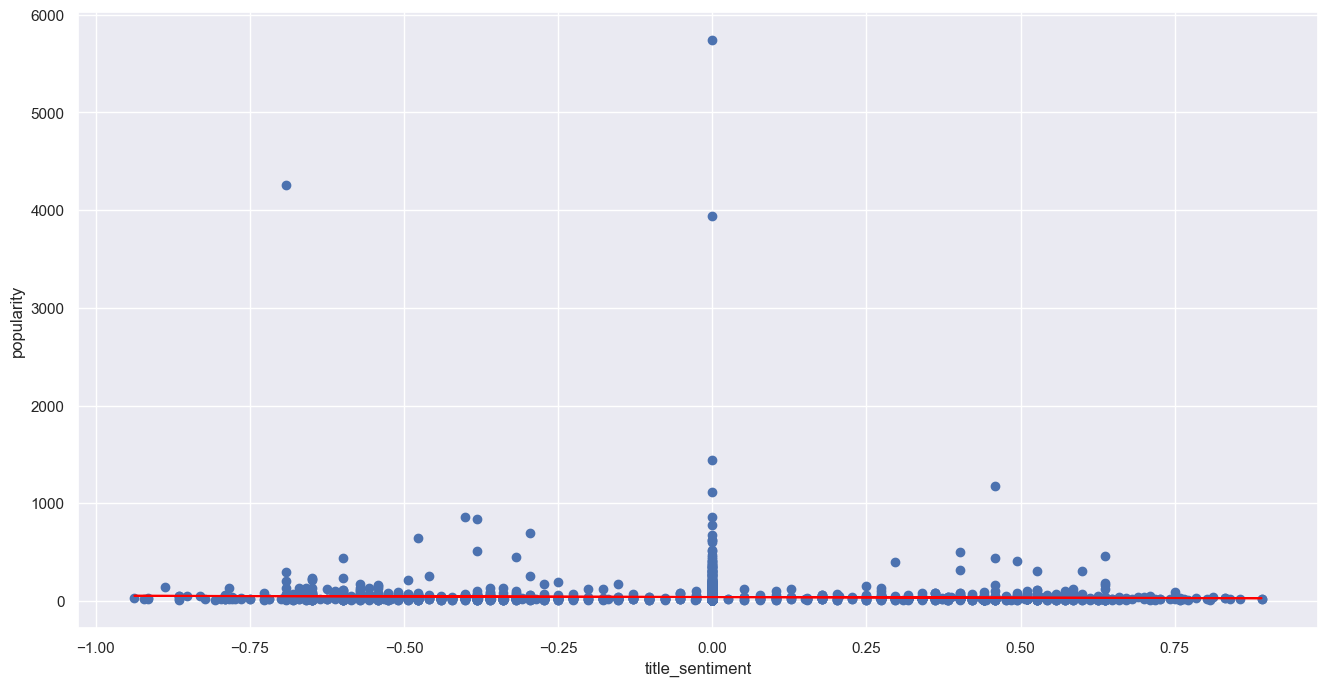

Intercept 	: b =  [40.0266513]
Coefficients 	: a =  [[-0.53664541]]
R^2 8.416633305197152e-06


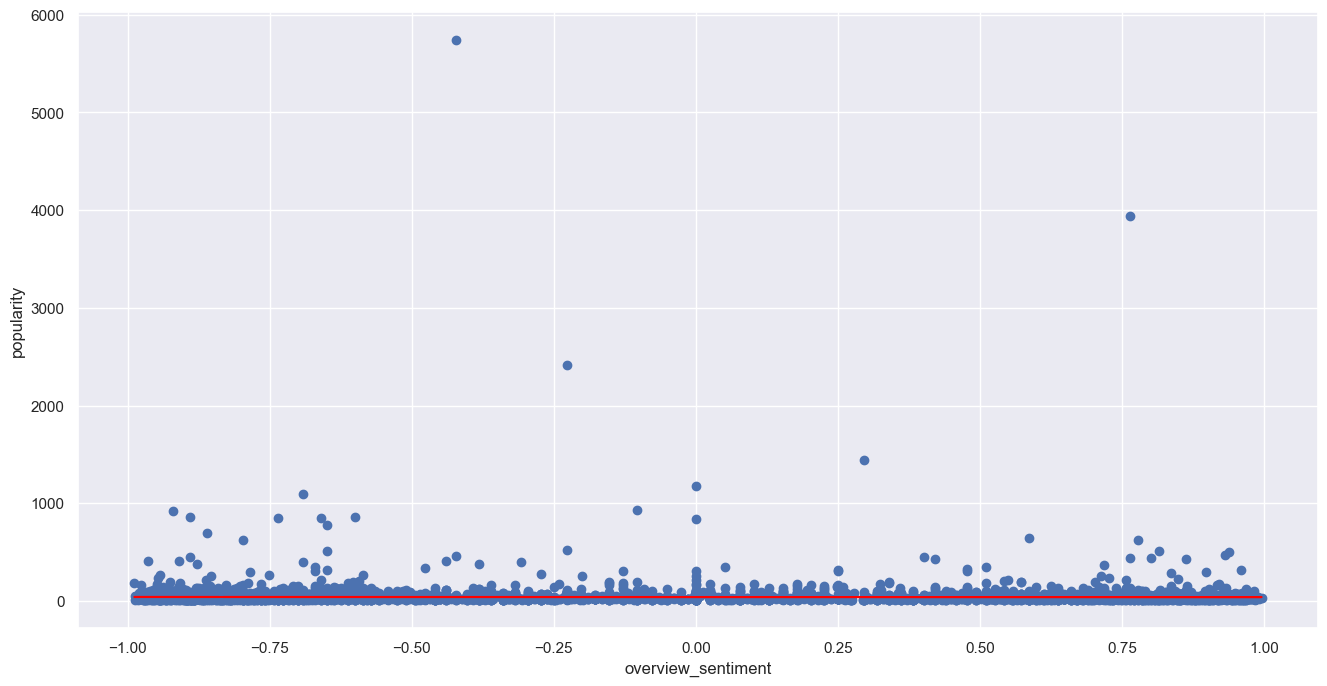

Intercept 	: b =  [37.88314646]
Coefficients 	: a =  [[0.09335139]]
R^2 6.372232412132917e-05


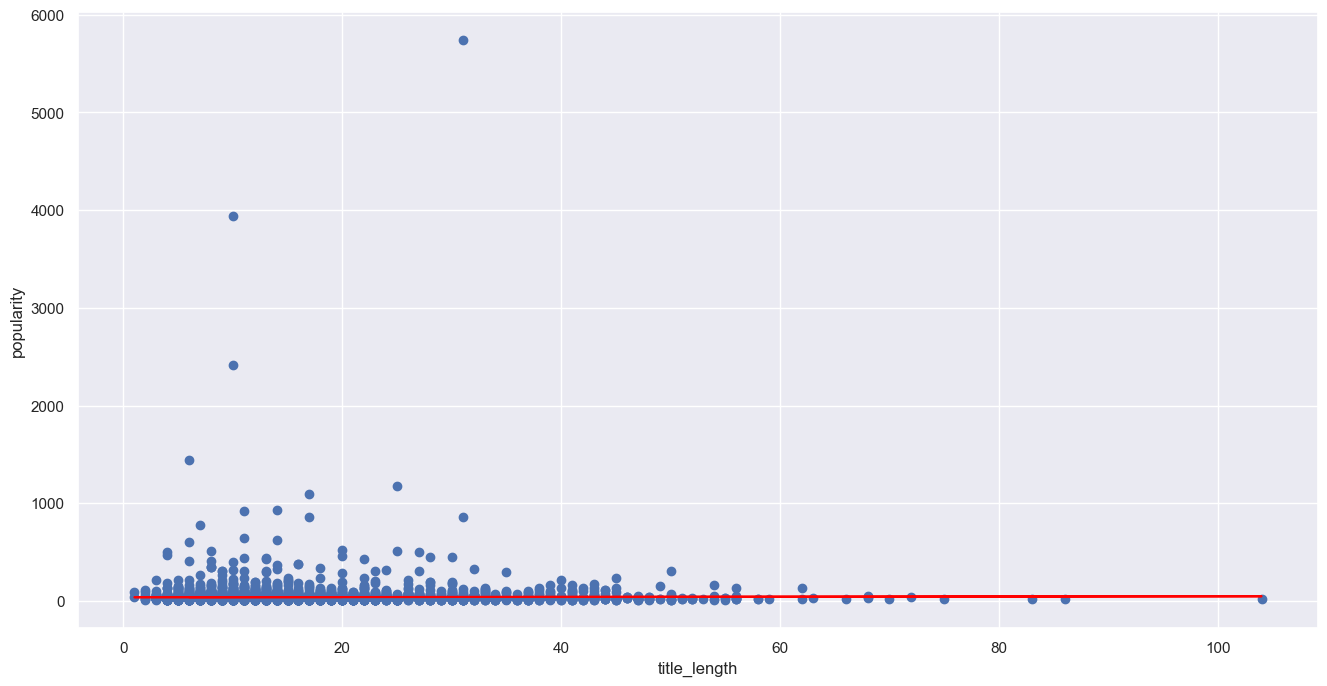

Intercept 	: b =  [36.44114142]
Coefficients 	: a =  [[1.11667195]]
R^2 0.0002481736781001498


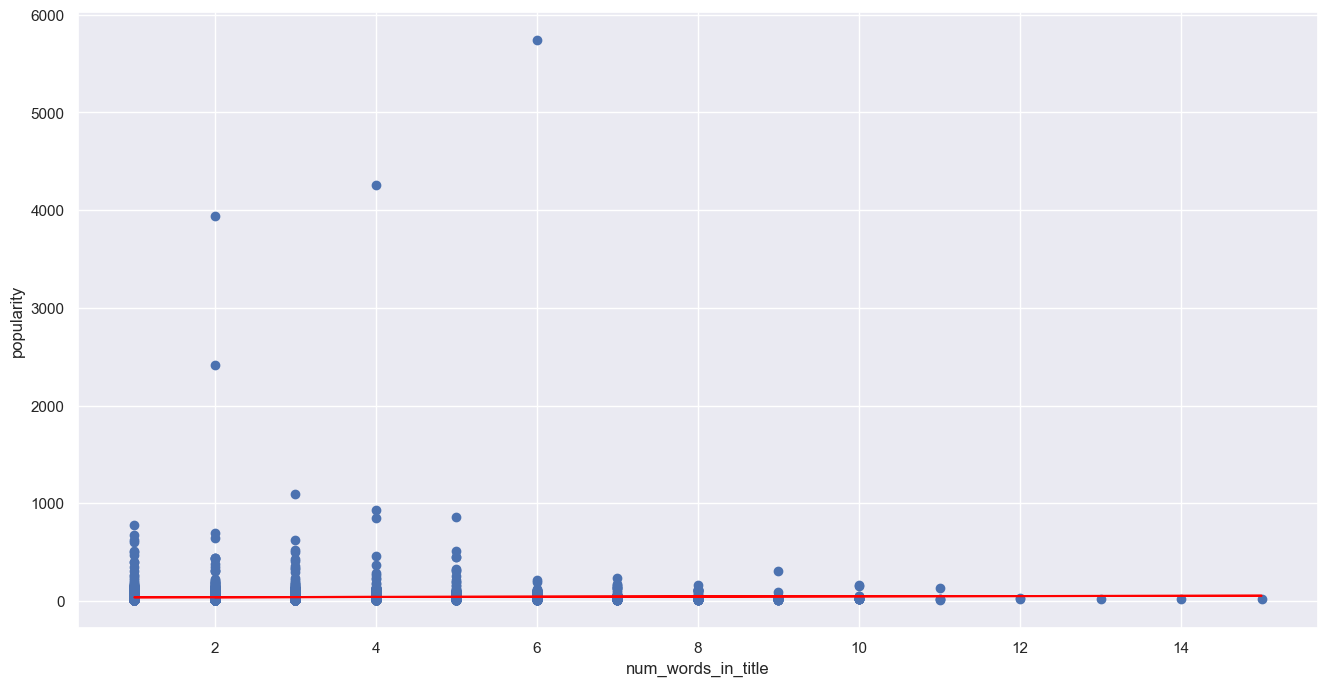

Intercept 	: b =  [41.58354111]
Coefficients 	: a =  [[-0.31627092]]
R^2 2.403785476734477e-05


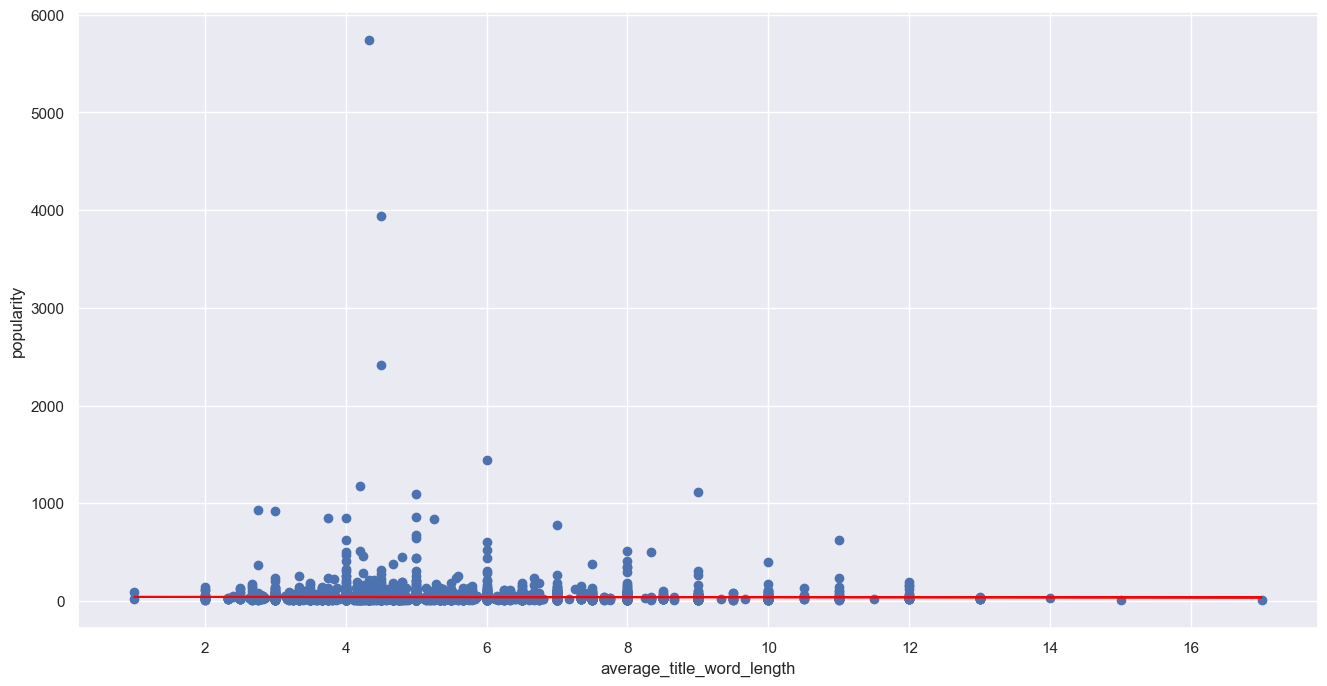

Intercept 	: b =  [38.59019798]
Coefficients 	: a =  [[5.24850392]]
R^2 0.00036266428750264534


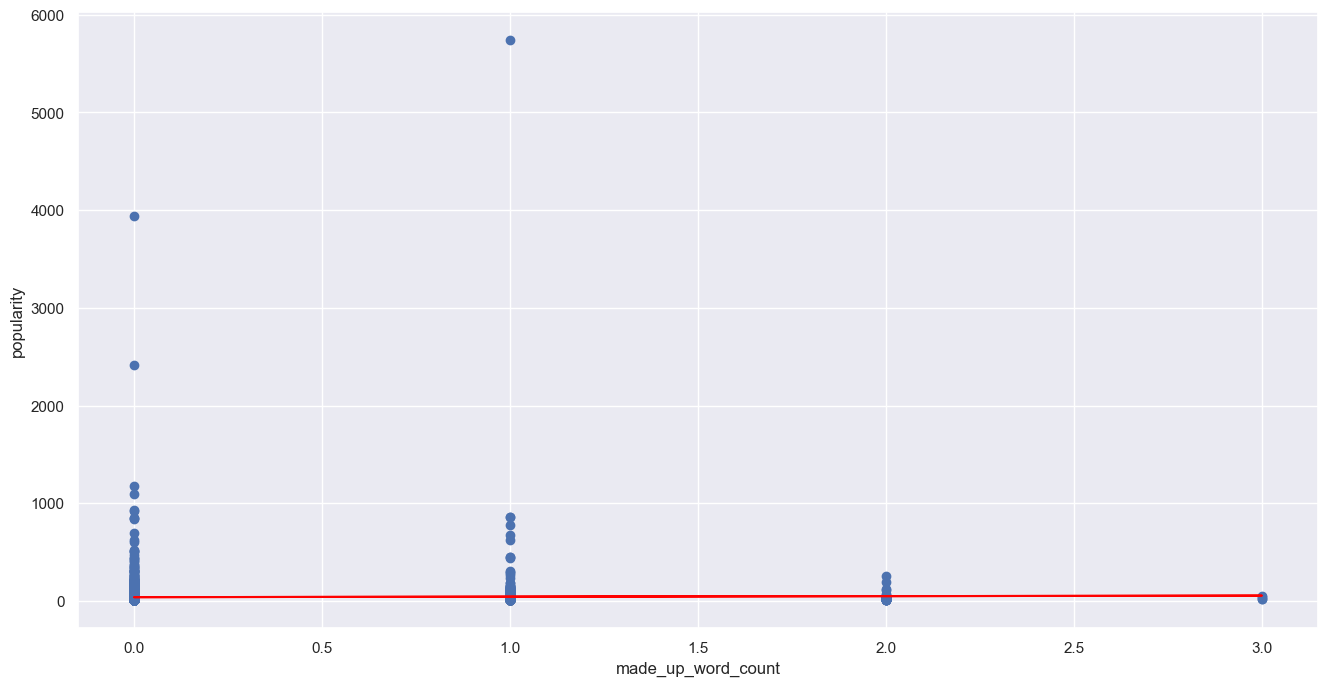

Intercept 	: b =  [31.14775943]
Coefficients 	: a =  [[0.00390705]]
R^2 0.010856612405388377


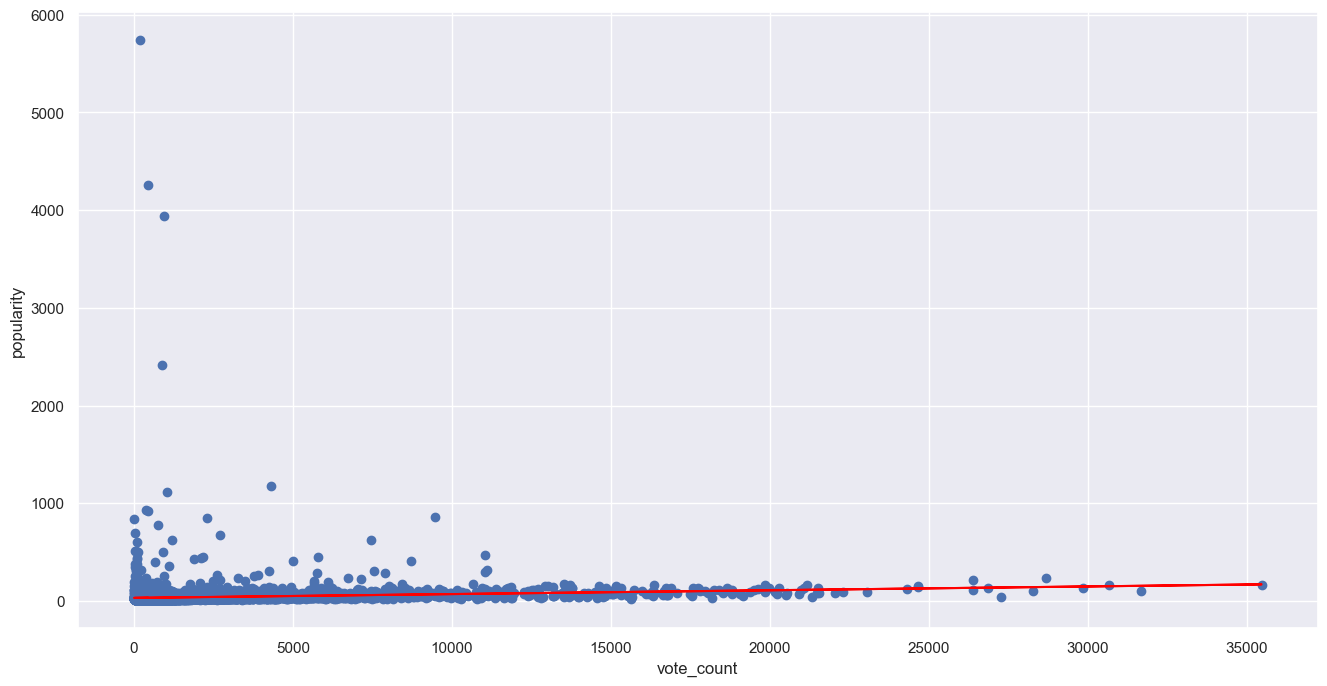

In [28]:
title_sentiment_linreg = performLinearRegression(data, 'title_sentiment', 'popularity')
overview_sentiment_linreg = performLinearRegression(data, 'overview_sentiment', 'popularity')
title_length_linreg = performLinearRegression(data, 'title_length', 'popularity')
num_words_in_title_linreg = performLinearRegression(data, 'num_words_in_title', 'popularity')
average_title_word_length_linreg = performLinearRegression(data, 'average_title_word_length', 'popularity')
made_up_word_count_linreg = performLinearRegression(data, 'made_up_word_count', 'popularity')
vote_count_linreg = performLinearRegression(data, 'vote_count', 'popularity')

# Classification Tree

vote_average vs. has_made_up_word with depth 3


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 54.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Train Classification Accuracy 	: 0.8357576873503959
Test Classification Accuracy 	: 0.8332413031474324
True Positive Rate: 0.0044742729306487695
False Positive Rate: 0.00044081992506061276
True Negative Rate: 0.9995591800749394
False Negative Rate: 0.9955257270693513
True Positive Rate: 0.0033003300330033004
False Positive Rate: 0.0
True Negative Rate: 1.0
False Negative Rate: 0.9966996699669967


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 70.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


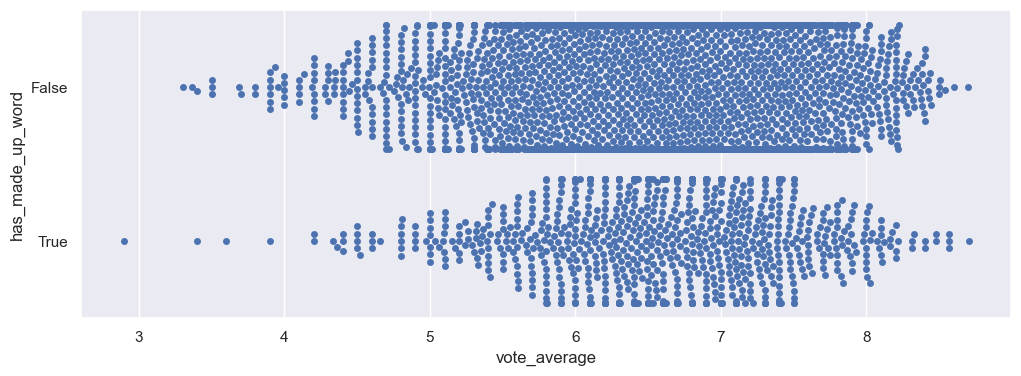

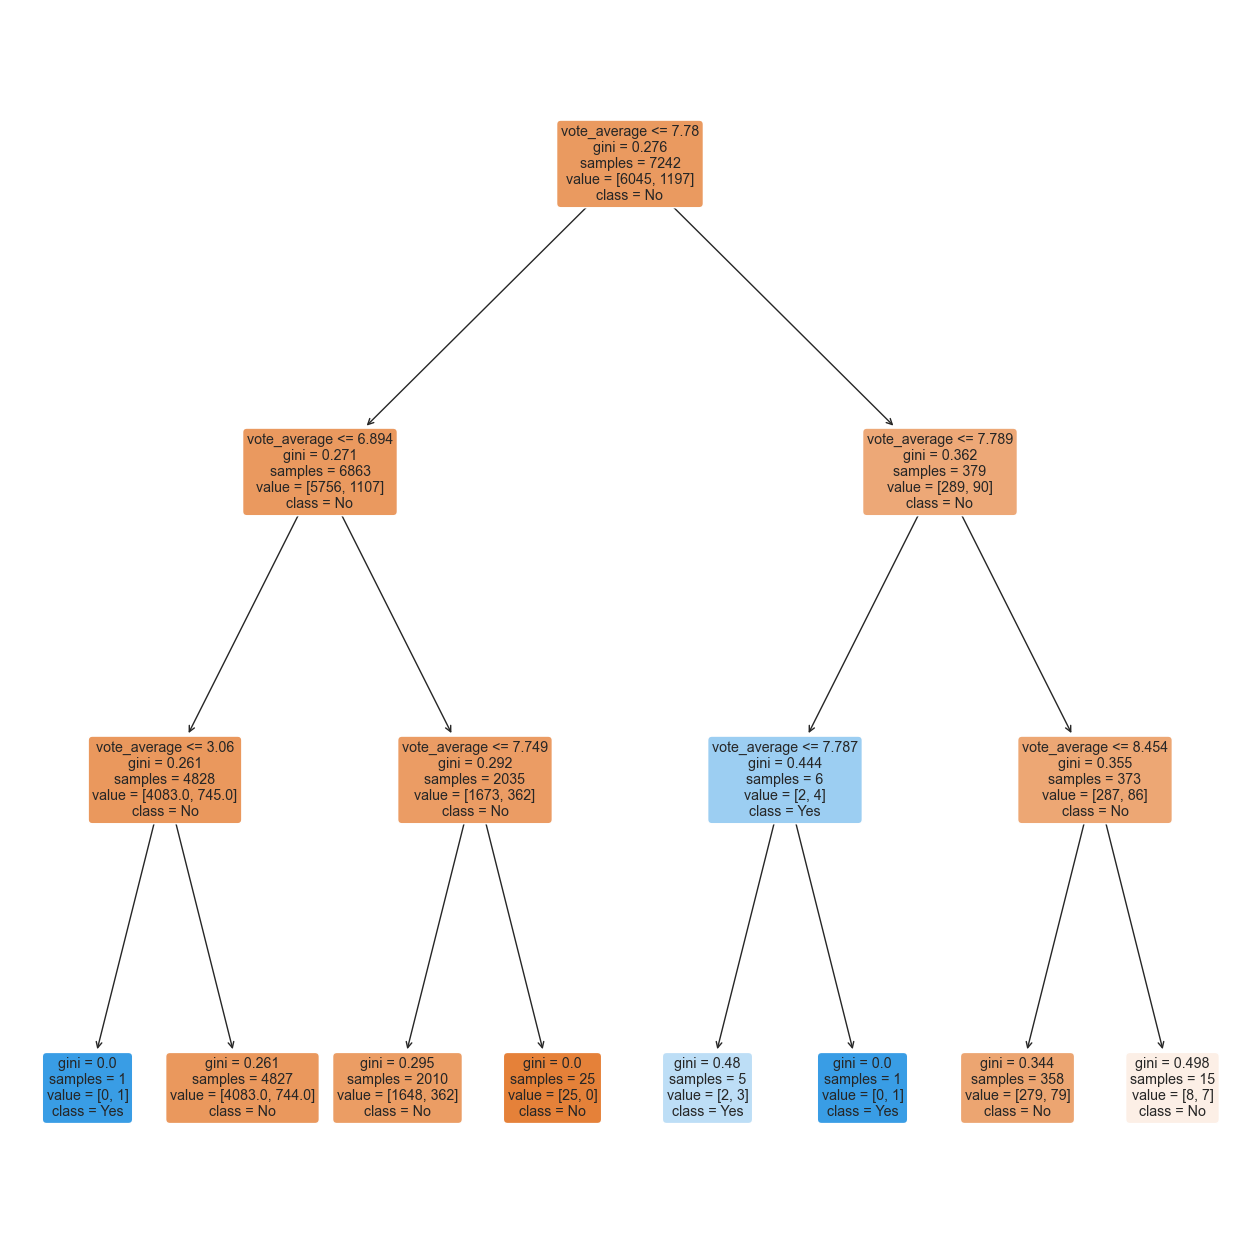

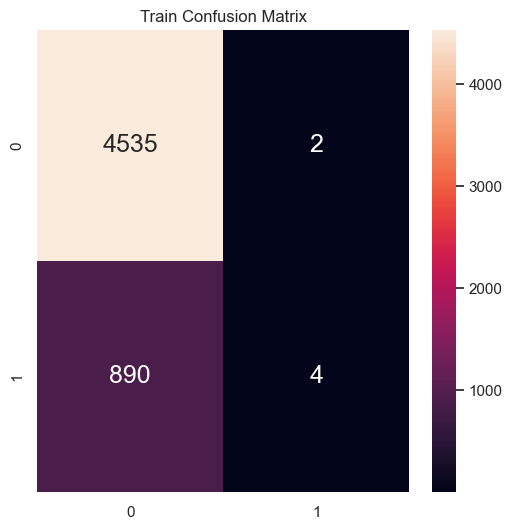

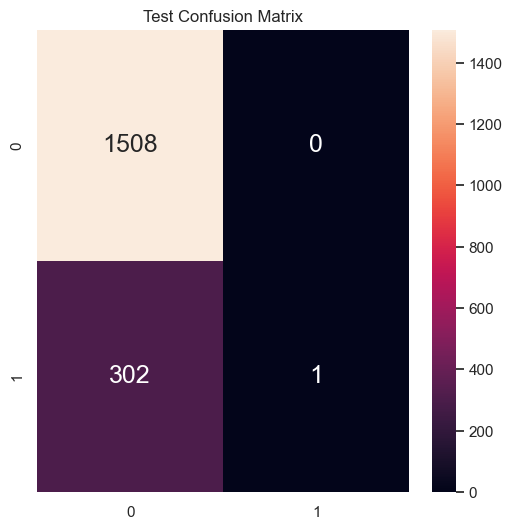

In [29]:
response_train_depth_4, response_train_pred_depth_4, response_test_depth_4, response_test_pred_depth_4 = generateClassificationTree(data,"vote_average",  "has_made_up_word",3 , ["No", "Yes"])
generateConfusionMatrix(response_train_depth_4, response_train_pred_depth_4, "Train Confusion Matrix")
generateConfusionMatrix(response_test_depth_4, response_test_pred_depth_4, "Test Confusion Matrix")